<div class="alert alert-success">
  <strong>DATASET:</strong> 5j0n_ProjectionsAngles_ProjNber5000_AngCoverage2.0,0.4,2.0_AngShift0.0,0.0,0.0.h5
    <hr/>
    <strong>TEST IF RECONSTRUCTION CHANGES WHEN DUMMY ROTATION IS APPLIED</strong>
</div>

# Reconstruction

<div class="alert alert-danger">
  <strong>NOTE:</strong> This is done on a PC where I don't need X11 forwarding (since <code>mayavi</code> is a graphic package, and the lab's server doesn't support X11).
</div>

Reference: https://tomroelandts.com/articles/astra-toolbox-tutorial-reconstruction-from-projection-images-part-2

In [2]:
# !pip install mayavi

In [3]:
# !pip install gast

In [1]:
from numba import cuda
cuda.select_device(0)
cuda.close()

In [2]:
import numpy as np
from os import mkdir
from os.path import join, isdir
from imageio import imread, imwrite
import matplotlib.pyplot as plt
import astra
import h5py
import os
import mrcfile
#from tvtk.api import tvtk
from mayavi import mlab
from IPython.display import Image
import sys
sys.path.append("../..") 
from cryoem.reconstruction import reconstruct
from cryoem.conversions import quaternion2euler #, euler2quaternion
#from cryoem.angle_alignment import update_quaternion

---

# Reconstruction with Ground-Truth Angles

## Reconstruction

In [6]:
projections = np.load("data/projections_estimated_le2_50k.npy")
angles_predicted = np.load("data/angles_true_estimated_le2_50k.npy")

In [7]:
reconstruction = reconstruct(projections[:3000], angles_predicted[:3000], mrc_filename=None)

In [8]:
mlab.contour3d(reconstruction, transparent=True)
mlab.colorbar(orientation='vertical')
# mlab.savefig("data/5a1a_projections_and_angles.tiff")
mlab.show()

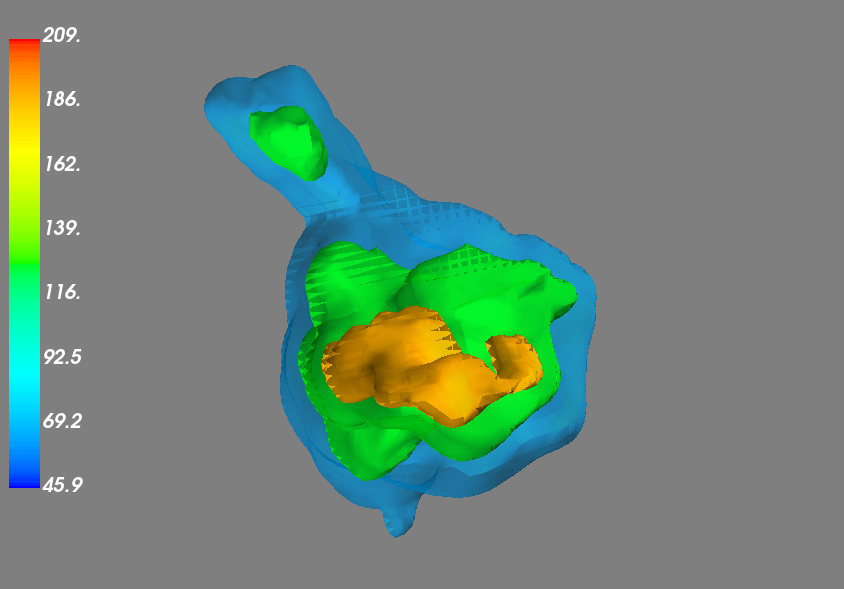

In [20]:
Image(filename='data/true_le2_50k.png')

---

# Reconstruction after dummy rotation

## Reconstruction

In [2]:
# projections = np.load("data/projections_estimated_le2_50k.npy")
# angles_predicted = np.load("data/angles_predicted_estimated_le2_50k.npy")

# m = [1., 1., 1., 1.]
# a_R = [tf.Variable([1., 2., 3., 1., 2., 3.])]
# q_predicted_rotated =  update_quaternion(m, a_R, euler2quaternion(angles_predicted))

# angles_predicted_rotated = quaternion2euler(q_predicted_rotated)
# np.save("data/angles_predicted_rotated", angles_predicted_rotated)

In [3]:
projections = np.load("data/projections_estimated_le2_50k.npy")
angles_predicted_rotated = np.load("data/angles_predicted_rotated.npy")

In [4]:
reconstruction = reconstruct(projections[:3000], angles_predicted_rotated[:3000], mrc_filename=None)

In [5]:
mlab.contour3d(reconstruction, transparent=True)
mlab.colorbar(orientation='vertical')
# mlab.savefig("data/5a1a_projections_and_angles.tiff")
mlab.show()

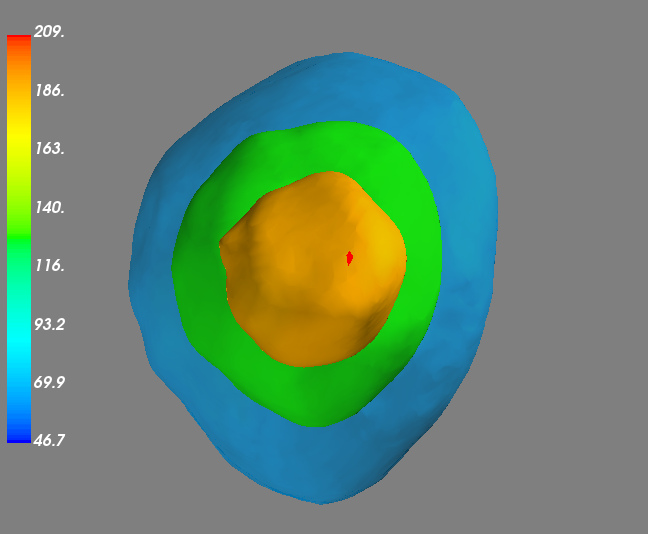

In [6]:
Image(filename='data/dummy_rotated_reconstruction.png')

---